In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/^NSEI.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [3]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df

Date          Open          High           Low         Close  \
0     2020-01-01  12202.150391  12222.200195  12165.299805  12182.500000   
1     2020-01-02  12198.549805  12289.900391  12195.250000  12282.200195   
2     2020-01-03  12261.099609  12265.599609  12191.349609  12226.650391   
3     2020-01-06  12170.599609  12179.099609  11974.200195  11993.049805   
4     2020-01-07  12079.099609  12152.150391  12005.349609  12052.950195   
...          ...           ...           ...           ...           ...   
1006  2024-01-23  21716.699219  21750.250000  21192.599609  21238.800781   
1007  2024-01-24  21185.250000  21482.349609  21137.199219  21453.949219   
1008  2024-01-25  21454.599609  21459.000000  21247.050781  21352.599609   
1009  2024-01-29  21433.099609  21763.250000  21429.599609  21737.599609   
1010  2024-01-30  21775.750000  21813.050781  21501.800781  21522.099609   

         Adj Close    Volume  
0     12182.500000  304100.0  
1     12282.200195  407700.0  
2     12226.650391  428800.0  
3     11993.049805  396500.0  
4     12052.950195  447800.0  
...            ...       ...  
1006  21238.800781  449700.0  
1007  21453.949219  407500.0  
1008  21352.599609  418100.0  
1009  21737.599609  376700.0  
1010  21522.099609  375100.0  

[1011 rows x 7 columns]

In [5]:
df=df[["Date","High"]]
df.head()

Date          High
0  2020-01-01  12222.200195
1  2020-01-02  12289.900391
2  2020-01-03  12265.599609
3  2020-01-06  12179.099609
4  2020-01-07  12152.150391

In [6]:
df.columns = ['ds','y']
# df['ds'] = pd.to_datetime(df['ds'])
df.tail()

ds             y
1006  2024-01-23  21750.250000
1007  2024-01-24  21482.349609
1008  2024-01-25  21459.000000
1009  2024-01-29  21763.250000
1010  2024-01-30  21813.050781

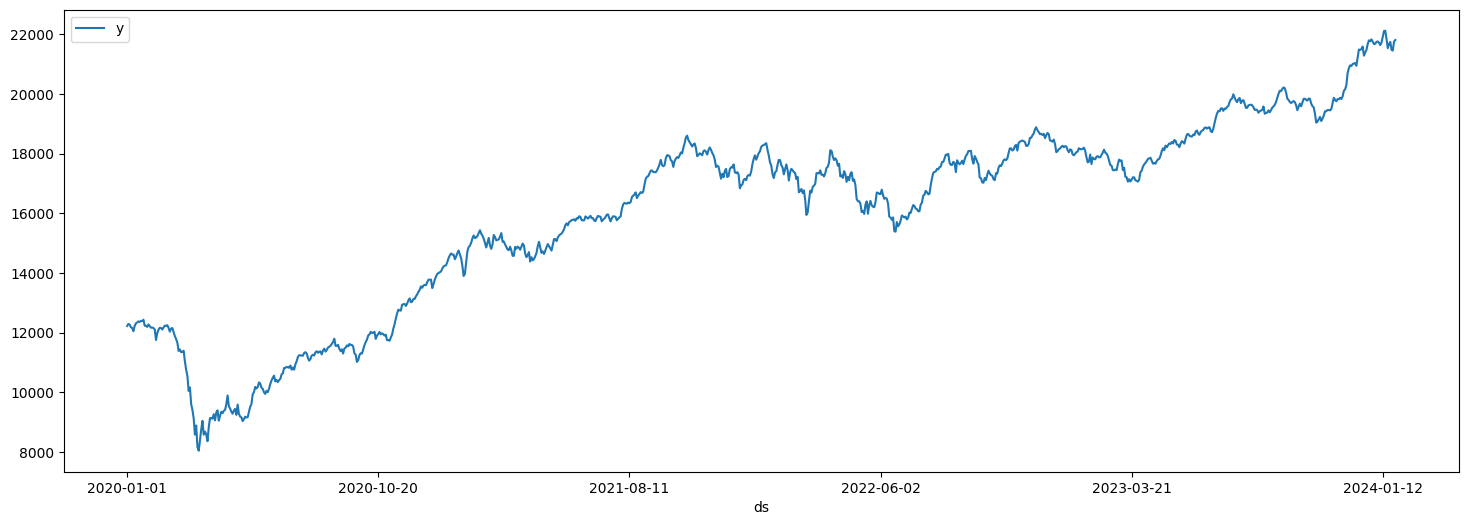

In [7]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.show()

In [8]:
df = df[df['ds'] >= '2020-04-01']

In [9]:
df

ds             y
63    2020-04-01   8588.099609
64    2020-04-03   8356.549805
65    2020-04-07   8819.400391
66    2020-04-08   9131.700195
67    2020-04-09   9128.349609
...          ...           ...
1006  2024-01-23  21750.250000
1007  2024-01-24  21482.349609
1008  2024-01-25  21459.000000
1009  2024-01-29  21763.250000
1010  2024-01-30  21813.050781

[948 rows x 2 columns]

<Axes: xlabel='ds'>

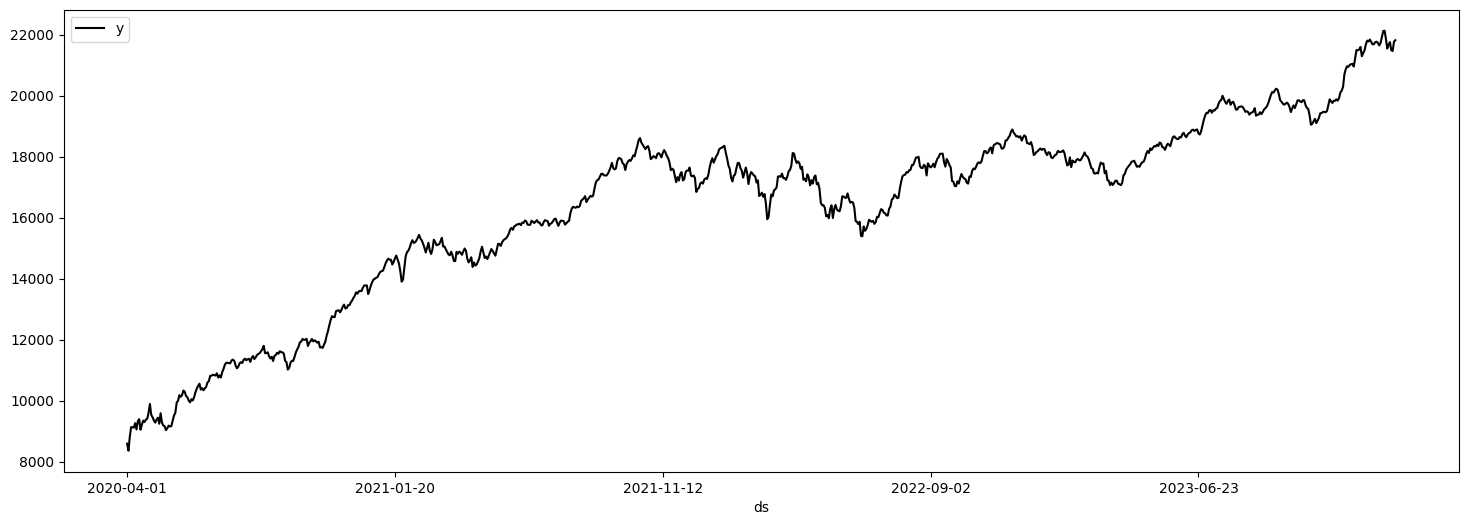

In [10]:
df.plot(x='ds',y='y',figsize=(18,6),color='black')

In [11]:
len(df)

948

In [12]:
train = df.iloc[:len(df)-150]
test = df.iloc[len(df)-150:]

In [13]:
train

ds             y
63   2020-04-01   8588.099609
64   2020-04-03   8356.549805
65   2020-04-07   8819.400391
66   2020-04-08   9131.700195
67   2020-04-09   9128.349609
..          ...           ...
856  2023-06-14  18769.699219
857  2023-06-15  18794.099609
858  2023-06-16  18864.699219
859  2023-06-19  18881.449219
860  2023-06-20  18839.699219

[798 rows x 2 columns]

In [14]:
test

ds             y
861   2023-06-21  18875.900391
862   2023-06-22  18886.599609
863   2023-06-23  18756.400391
864   2023-06-26  18722.050781
865   2023-06-27  18829.250000
...          ...           ...
1006  2024-01-23  21750.250000
1007  2024-01-24  21482.349609
1008  2024-01-25  21459.000000
1009  2024-01-29  21763.250000
1010  2024-01-30  21813.050781

[150 rows x 2 columns]

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=734) #MS for monthly, H for hourly
forecast = m.predict(future)

21:59:31 - cmdstanpy - INFO - Chain [1] start processing
21:59:32 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
1527 2025-06-19  24126.904610  9504.488718  40067.676249
1528 2025-06-20  24101.992036  9380.911928  39895.113080
1529 2025-06-21  23438.630350  8705.999796  39373.221158
1530 2025-06-22  23440.232476  8818.339281  39519.937148
1531 2025-06-23  24104.418495  9365.613480  40165.586826

In [17]:
forecast['yhat']=(forecast['yhat']+forecast['yhat_upper'] )/ 2

In [18]:
plot_plotly(m ,forecast)

In [19]:
plot_components_plotly(m, forecast)

In [20]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-150:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  10012.821203841137
Mean Value of Test Dataset: 20100.7260026


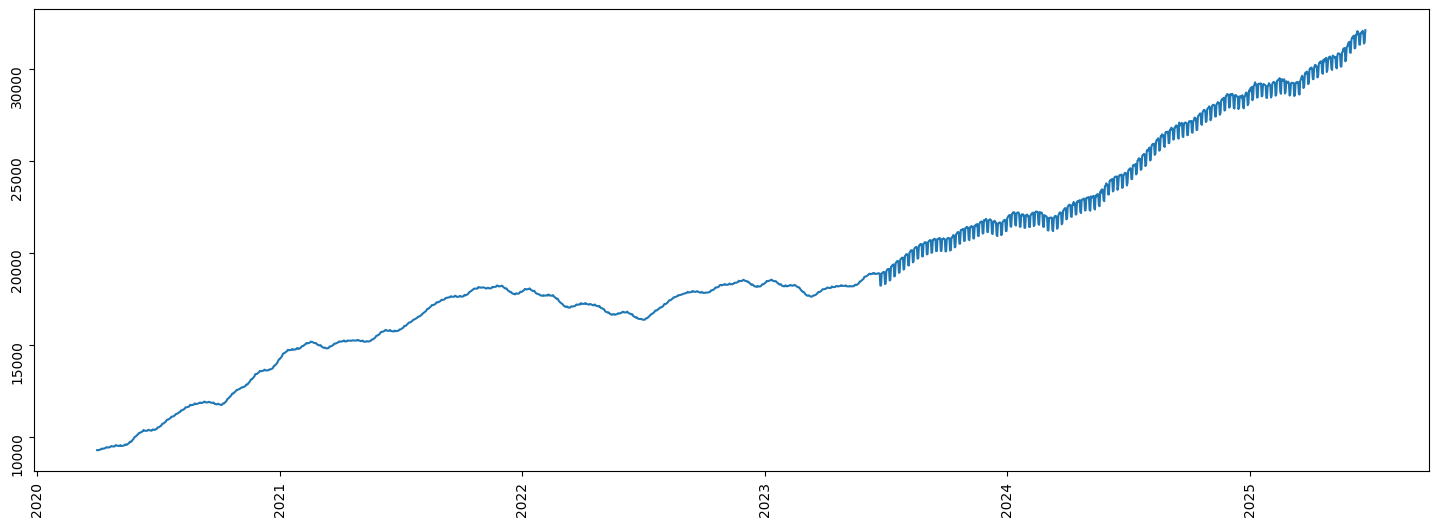

In [21]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

forecast = forecast.dropna(subset=['yhat'])

plt.figure(figsize=(18, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [22]:
forecast

ds         trend   yhat_lower    yhat_upper  trend_lower  \
0    2020-04-01   9513.872799  8641.913772   9473.497587  9513.872799   
1    2020-04-03   9536.086674  8636.585849   9480.096948  9536.086674   
2    2020-04-07   9580.514423  8681.600837   9520.171264  9580.514423   
3    2020-04-08   9591.621360  8740.332944   9549.579889  9591.621360   
4    2020-04-09   9602.728298  8734.399671   9528.581219  9602.728298   
...         ...           ...          ...           ...          ...   
1527 2025-06-19  24354.056212  9504.488718  40067.676249  9775.443893   
1528 2025-06-20  24361.504013  9380.911928  39895.113080  9758.644852   
1529 2025-06-21  24368.951813  8705.999796  39373.221158  9733.349281   
1530 2025-06-22  24376.399614  8818.339281  39519.937148  9708.053709   
1531 2025-06-23  24383.847415  9365.613480  40165.586826  9702.234462   

       trend_upper  additive_terms  additive_terms_lower  \
0      9513.872799     -448.046009           -448.046009   
1      9536.086674     -480.929309           -480.929309   
2      9580.514423     -468.068441           -468.068441   
3      9591.621360     -438.995860           -438.995860   
4      9602.728298     -457.448314           -457.448314   
...            ...             ...                   ...   
1527  40215.779487     -227.151602           -227.151602   
1528  40255.419754     -259.511976           -259.511976   
1529  40295.060020     -930.321463           -930.321463   
1530  40340.330279     -936.167139           -936.167139   
1531  40391.230531     -279.428920           -279.428920   

      additive_terms_upper      weekly  weekly_lower  weekly_upper  \
0              -448.046009  219.958306    219.958306    219.958306   
1              -480.929309  179.209271    179.209271    179.209271   
2              -468.068441  189.744080    189.744080    189.744080   
3              -438.995860  219.958306    219.958306    219.958306   
4              -457.448314  202.975967    202.975967    202.975967   
...                    ...         ...           ...           ...   
1527           -227.151602  202.975967    202.975967    202.975967   
1528           -259.511976  179.209271    179.209271    179.209271   
1529           -930.321463 -484.216175   -484.216175   -484.216175   
1530           -936.167139 -484.215543   -484.215543   -484.215543   
1531           -279.428920  176.544093    176.544093    176.544093   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -668.004315   -668.004315   -668.004315                   0.0   
1    -660.138580   -660.138580   -660.138580                   0.0   
2    -657.812521   -657.812521   -657.812521                   0.0   
3    -658.954166   -658.954166   -658.954166                   0.0   
4    -660.424281   -660.424281   -660.424281                   0.0   
...          ...           ...           ...                   ...   
1527 -430.127569   -430.127569   -430.127569                   0.0   
1528 -438.721247   -438.721247   -438.721247                   0.0   
1529 -446.105289   -446.105289   -446.105289                   0.0   
1530 -451.951596   -451.951596   -451.951596                   0.0   
1531 -455.973013   -455.973013   -455.973013                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0   9269.662189  
1                            0.0                         0.0   9267.627157  
2                            0.0                         0.0   9316.308623  
3                            0.0                         0.0   9351.102695  
4                            0.0                         0.0   9336.930601  
...                          ...                         ...           ...  
1527                         0.0                         0.0  32097.290429  
1528                         0.0                         0.0  31998.552558  
1529                         0.0        

In [23]:
forecast = forecast[(forecast['ds'] >= '2024-02-01') & (forecast['ds'].dt.year <= forecast['ds'].dt.year.max())]
forecast=forecast[['ds','yhat']]
# forecast.columns = ['Date','Indexfund']
forecast.reset_index(drop=True, inplace=True)

In [24]:
forecast

ds          yhat
0   2024-02-01  22005.869965
1   2024-02-02  22009.753826
2   2024-02-03  21425.675595
3   2024-02-04  21413.937666
4   2024-02-05  22056.247157
..         ...           ...
504 2025-06-19  32097.290429
505 2025-06-20  31998.552558
506 2025-06-21  31405.925754
507 2025-06-22  31480.084812
508 2025-06-23  32135.002661

[509 rows x 2 columns]

In [25]:
result_df=pd.read_csv('E:/forecast.csv')
result_df = pd.DataFrame(result_df)

In [26]:
result_df

Date           BTC
0    2024-01-01  4.004751e+06
1    2024-01-02  4.010403e+06
2    2024-01-03  4.041379e+06
3    2024-01-04  4.058741e+06
4    2024-01-05  4.040965e+06
..          ...           ...
510  2025-05-25  8.139139e+06
511  2025-05-26  8.125196e+06
512  2025-05-27  8.186234e+06
513  2025-05-28  8.219278e+06
514  2025-05-29  8.209488e+06

[515 rows x 2 columns]

In [27]:
result_df = pd.concat([result_df,forecast],axis=1,ignore_index=True)


In [28]:
result_df

0             1          2             3
0    2024-01-01  4.004751e+06 2024-02-01  22005.869965
1    2024-01-02  4.010403e+06 2024-02-02  22009.753826
2    2024-01-03  4.041379e+06 2024-02-03  21425.675595
3    2024-01-04  4.058741e+06 2024-02-04  21413.937666
4    2024-01-05  4.040965e+06 2024-02-05  22056.247157
..          ...           ...        ...           ...
510  2025-05-25  8.139139e+06        NaT           NaN
511  2025-05-26  8.125196e+06        NaT           NaN
512  2025-05-27  8.186234e+06        NaT           NaN
513  2025-05-28  8.219278e+06        NaT           NaN
514  2025-05-29  8.209488e+06        NaT           NaN

[515 rows x 4 columns]

In [29]:
result_df.to_csv('forecast.csv', index=False)